# RNA clasificador de imagenes

### Nombres
- Juan Sebastian Tibatá Piraligua
- Valentina Montenegro Quevedo
- Juan Jose Riaño Cardenas
- Gerardo Ropero Rojas


## Importar librerias

In [1]:
%pip install opencv-python
%pip install scikit-learn
%pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import cv2
import numpy as np
import os
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## Parametros de las imagenes

In [3]:
img_size = (64, 64)
data = []
labels = []

## Etiquetas

In [4]:
etiquetas = {
    "cats": 0,
    "dogs": 1
}


## Cargar imagenes

In [5]:
def cargar_imagenes(directorio, etiqueta):
    for clase in os.listdir(directorio):
        clase_path = os.path.join(directorio, clase)
        for archivo in os.listdir(clase_path):
            ruta_img = os.path.join(clase_path, archivo)
            img = cv2.imread(ruta_img)
            if img is not None:
                img = cv2.resize(img, img_size)
                data.append(img.flatten())
                labels.append(etiqueta[clase])
                

cargar_imagenes("train", etiquetas)


## Normalizar y convertir a arrays

In [6]:
X_train = np.array(data) / 255.0
y_train = np.array(labels)

## Cargar datos de prueba

In [7]:
cargar_imagenes("test", etiquetas)
X_test = np.array(data) / 255.0
y_test = np.array(labels)

## Entrenar red

In [8]:
clf = MLPClassifier(hidden_layer_sizes=(128,),activation = 'relu',solver='adam', max_iter=1000,early_stopping=True, random_state=42,learning_rate_init=0.001)
clf.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(128,), max_iter=1000,
              random_state=42)

## Evaluar

In [9]:
y_pred = clf.predict(X_test)
print(f'Precisión en test: {accuracy_score(y_test, y_pred):.2f}')

Precisión en test: 0.72


## Predecir nueva imagen

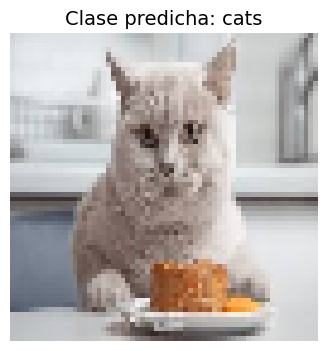

In [12]:
# Para invertir el diccionario etiquetas y mostrar al final la clase predicha
etiquetas_invertido = {v: k for k, v in etiquetas.items()}

img = cv2.imread("cat.jpeg")
img_resized = cv2.resize(img, img_size)
img_flat = img_resized.flatten().reshape(1, -1) / 255.0

pred = clf.predict(img_flat)[0]
nombre_clase = etiquetas_invertido[pred]

img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(4, 4))
plt.imshow(img_rgb)
plt.title(f"Clase predicha: {nombre_clase}", fontsize=14)
plt.axis("off")
plt.show()